In [8]:
from __future__ import print_function ,absolute_import , division , unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

In [2]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived') # We removed the `survived` column from the data set and put that into a new variable
y_eval = dfeval.pop('survived')  # We removed the `survived` column from the data set and put that into a new variable
# print(dftrain.head) #To show the dataset
print(dict(dftrain))

{'sex': 0        male
1      female
2      female
3      female
4        male
        ...  
622      male
623      male
624    female
625    female
626      male
Name: sex, Length: 627, dtype: object, 'age': 0      22.0
1      38.0
2      26.0
3      35.0
4      28.0
       ... 
622    28.0
623    25.0
624    19.0
625    28.0
626    32.0
Name: age, Length: 627, dtype: float64, 'n_siblings_spouses': 0      1
1      1
2      0
3      1
4      0
      ..
622    0
623    0
624    0
625    1
626    0
Name: n_siblings_spouses, Length: 627, dtype: int64, 'parch': 0      0
1      0
2      0
3      0
4      0
      ..
622    0
623    0
624    0
625    2
626    0
Name: parch, Length: 627, dtype: int64, 'fare': 0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.4583
        ...   
622    10.5000
623     7.0500
624    30.0000
625    23.4500
626     7.7500
Name: fare, Length: 627, dtype: float64, 'class': 0       Third
1       First
2       Third
3       First
4       Third
     

In [3]:
# some important features of the data can be calculated using pandas.

print(dftrain.describe())
print("\n\n\nThe shape gives total entries(rows) and total columns")
print(dftrain.shape)
print("\n\n\n")

l = dftrain["deck"].unique() #print all the unique data in that column
ls = []

ls.append(tf.feature_column.categorical_column_with_vocabulary_list("deck", l))
print(ls)


              age  n_siblings_spouses       parch        fare
count  627.000000          627.000000  627.000000  627.000000
mean    29.631308            0.545455    0.379585   34.385399
std     12.511818            1.151090    0.792999   54.597730
min      0.750000            0.000000    0.000000    0.000000
25%     23.000000            0.000000    0.000000    7.895800
50%     28.000000            0.000000    0.000000   15.045800
75%     35.000000            1.000000    0.000000   31.387500
max     80.000000            8.000000    5.000000  512.329200



The shape gives total entries(rows) and total columns
(627, 9)




[VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0)]


AxesSubplot(0.125,0.125;0.775x0.755)


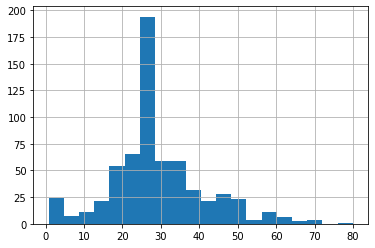

In [4]:
# visualize a bit of the data using pandas inbuilt histogram

print(dftrain.age.hist(bins=20))
#Our range is from 1,80 and since bin is 20 , so we will group our range (1,80) into 20 parts.
# Notice in the graph that we have 20 bars since our bin is set to 20



In [9]:
cat_cols = ["sex" , "n_siblings_spouses" ,"parch" , "class" , "deck" ,"embark_town" , "alone" ]
num_cols = ["age" , "fare"]

feature_cols = []

for i in cat_cols:
    x = dftrain[i].unique()
    feature_cols.append(tf.feature_column.categorical_column_with_vocabulary_list( i , x))
for j in num_cols:
    feature_cols.append(tf.feature_column.numeric_column(j , dtype = tf.float32))


In [21]:
# Now we need to make an input function. The main task of input function is simple, Its takes in some data. 
# It divides those data into smaller batches. Then it shuffles the data to prevent the model from memorising data points.
# Remember in order to do analysis on data using tensorflow we first have to convert our pandas dataframe into tf.data.Dataset object. Only then Tensorflow 
#can work on the data

def input_fn(dftrain , dflabel , shuffle=False  , epoch =100 , bat_size = 32):
    
    def fn():
        dataset = tf.data.Dataset.from_tensor_slices( (dict(dftrain) , dflabel))
        if shuffle:
            dataset = dataset.shuffle(1000)
        dataset = dataset.batch(bat_size).repeat(epoch)
        return(dataset)
    return(fn)


#next step is training our model. It is pretty simple too. The way this is done is by first giving the model the input data and the expected data.
# Remember  , our dftrain was our training data and y_train was our expected result. We will train our model on this training data.

train_input_fn = input_fn(dftrain, y_train)
eval_input_fn = input_fn(dfeval , y_eval , epoch=1 ,shuffle=False)


linear_est = tf.estimator.LinearClassifier(feature_columns=feature_cols)
linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data

clear_output()  # clears consoke output
print(result['accuracy'])  # the result variable is simply a dict of stats about our model

0.78409094
